In [1]:
# EXP_NAME="ViTDCNv3HeavyDetach_tuner_config_ML_1M"
# EXP_NAME="ViTDCNv3HeavyDim_tuner_config_iPinYou"
# EXP_NAME="ViTDCNv3HeavyDim_tuner_config_iPinYou"
# EXP_NAME="PGAResNet_tuner_config_iPinYou"
EXP_NAME="LogDCNv2_tuner_config_iPinYou"

In [2]:
import yaml
with open(f'config/{EXP_NAME}/model_config.yaml', 'r') as file:
    model_configs = yaml.safe_load(file)
model_configs

In [ ]:
import csv
import re
import numpy as np
import matplotlib.pyplot as plt
import yaml

results = []
with open(f"{EXP_NAME}.csv", 'r') as f:
    reader = csv.reader(f)
    for row in reader:
        config_key = row[2].split()[1]
        test_column = row[6]
        match = re.search(r'logloss: ([0-9.]+) - AUC: ([0-9.]+)', test_column)
        if match:
            logloss = float(match.group(1))
            auc = float(match.group(2))
            if(auc < 0.6):
                continue
            result = {'logloss': logloss, 'AUC': auc}
            try:
                # if(len(backup_df)):
                #     if(len(backup_df[(backup_df["logloss"] == logloss) & (backup_df["AUC"] == auc)])):
                #         continue
                result.update(model_configs[config_key])
                results.append(result)
            except Exception as e:
                print(e)
                pass

In [ ]:
results

[{'logloss': 0.005657,
  'AUC': 0.776493,
  'batch_norm': True,
  'batch_size': 40960,
  'dataset_id': 'iPinYou_x1_csv_c2b11acf',
  'debug_mode': False,
  'deep_net_dropout': 0.1,
  'early_stop_patience': 2,
  'embedding_dim': 16,
  'embedding_regularizer': 0.001,
  'epochs': 100,
  'eval_steps': None,
  'feature_config': None,
  'feature_specs': None,
  'group_id': None,
  'layer_norm': True,
  'learning_rate': 0.001,
  'loss': 'binary_crossentropy',
  'mask_feature': False,
  'mask_with_bias': True,
  'metrics': ['logloss', 'AUC'],
  'model': 'PGAViT',
  'model_root': './checkpoints/',
  'monitor': {'AUC': 1, 'logloss': 0},
  'monitor_mode': 'max',
  'net_regularizer': 0,
  'num_deep_cross_layers': 3,
  'num_heads': 1,
  'num_shallow_cross_layers': 3,
  'num_workers': 16,
  'optimizer': 'adam',
  'pickle_feature_encoder': True,
  'save_best_only': True,
  'seed': 2024,
  'shallow_net_dropout': 0.2,
  'shuffle': True,
  'task': 'binary_classification',
  'use_features': None,
  'verbo

In [ ]:
import pandas as pd

df = pd.DataFrame(results)
df

,logloss,AUC,batch_norm,batch_size,dataset_id,debug_mode,deep_net_dropout,early_stop_patience,embedding_dim,embedding_regularizer,...,shuffle,task,use_features,verbose,vit_after_steps,vit_detach_param,vit_hidden_dim,vit_num_heads,vit_num_layers,vit_patch_size
0,0.005657,0.776493,True,40960,iPinYou_x1_csv_c2b11acf,False,0.1,2,16,0.001,...,True,binary_classification,None,1,0,True,128,8,1,8
1,0.005583,0.771068,True,40960,iPinYou_x1_csv_c2b11acf,False,0.1,2,16,0.001,...,True,binary_classification,None,1,0,True,128,8,1,8
2,0.005565,0.778371,True,40960,iPinYou_x1_csv_c2b11acf,False,0.1,2,16,0.001,...,True,binary_classification,None,1,0,True,32,8,2,8
3,0.005549,0.780742,True,40960,iPinYou_x1_csv_c2b11acf,False,0.1,2,16,0.001,...,True,binary_classification,None,1,0,True,64,8,2,8
4,0.005649,0.769713,True,40960,iPinYou_x1_csv_c2b11acf,False,0.1,2,16,0.001,...,True,binary_classification,None,1,0,True,128,8,2,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,0.005615,0.778848,True,40960,iPinYou_x1_csv_c2b11acf,False,0.1,2,16,0.001,...,True,binary_classification,None,1,0,True,32,8,2,8
119,0.005617,0.769653,True,40960,iPinYou_x1_csv_c2b11acf,False,0.1,2,16,0.001,...,True,binary_classification,None,1,0,True,64,8,2,8
120,0.005581,0.780343,True,40960,iPinYou_x1_csv_c2b11acf,False,0.1,2,16,0.001,...,True,binary_classification,None,1,0,True,128,8,1,8
121,0.005561,0.780804,True,40960,iPinYou_x1_csv_c2b11acf,False,0.1,2,16,0.001,...,True,binary_classification,None,1,0,True,128,8,1,8


In [ ]:
df[df.select_dtypes(include=['object']).columns] = df.select_dtypes(include=['object']).astype('string')

In [ ]:
df.dropna()

,logloss,AUC,batch_norm,batch_size,dataset_id,debug_mode,deep_net_dropout,early_stop_patience,embedding_dim,embedding_regularizer,...,shuffle,task,use_features,verbose,vit_after_steps,vit_detach_param,vit_hidden_dim,vit_num_heads,vit_num_layers,vit_patch_size


In [ ]:
# assert False
# if(False):
#   df.to_pickle(f"{EXP_NAME}_backup.pkl")

In [ ]:
metrics = ["logloss", "AUC"]
hyperparam_lst = set(df.columns) - set(metrics)
more_than_two_cols = [param for param in list(hyperparam_lst) if len(df[param].unique()) > 1 ]
more_than_two_cols

['mask_with_bias',
 'num_shallow_cross_layers',
 'vit_hidden_dim',
 'num_deep_cross_layers',
 'vit_num_layers']

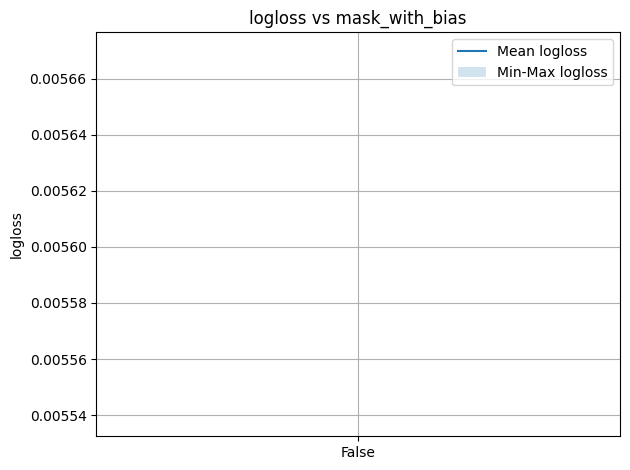

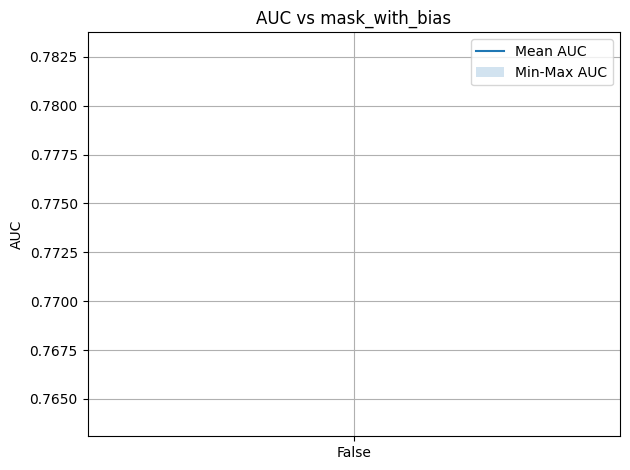

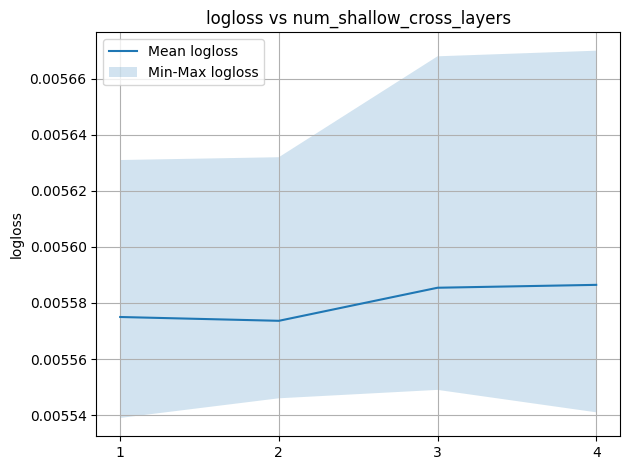

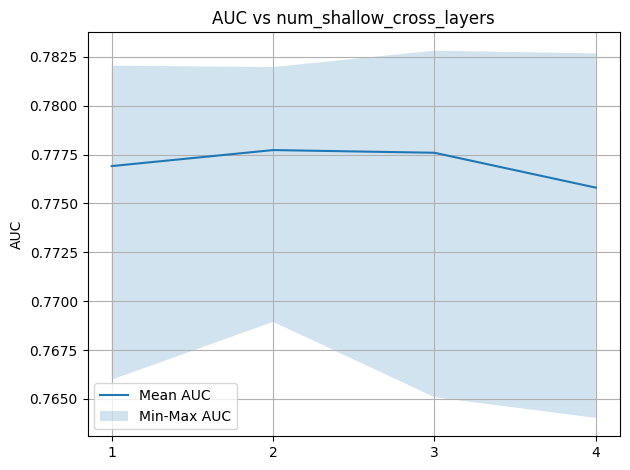

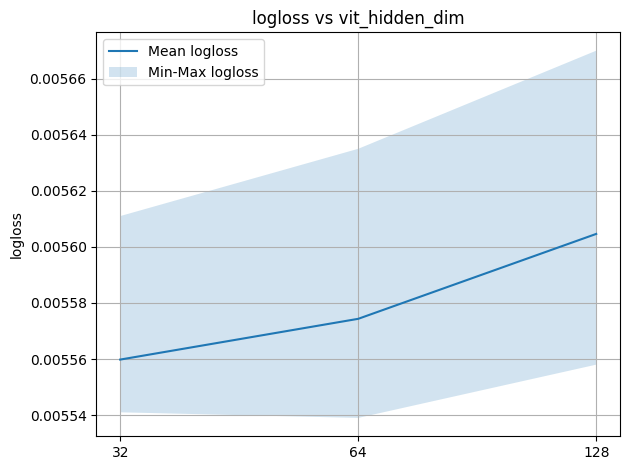

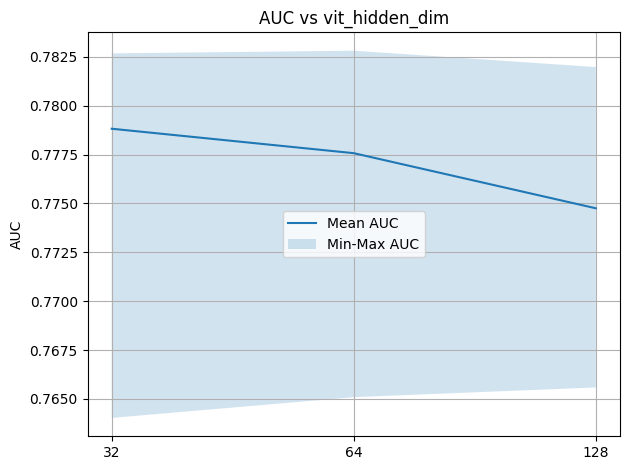

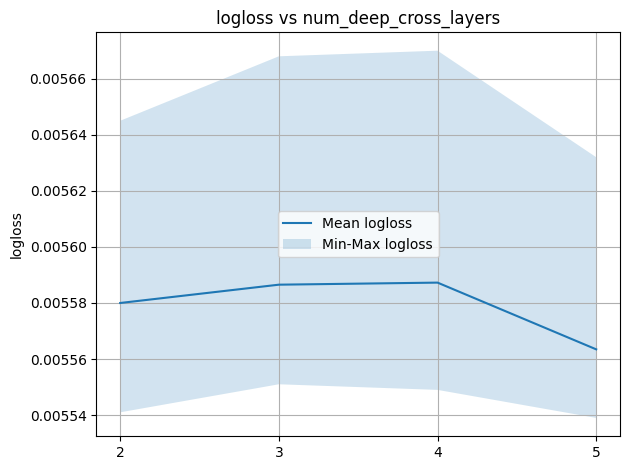

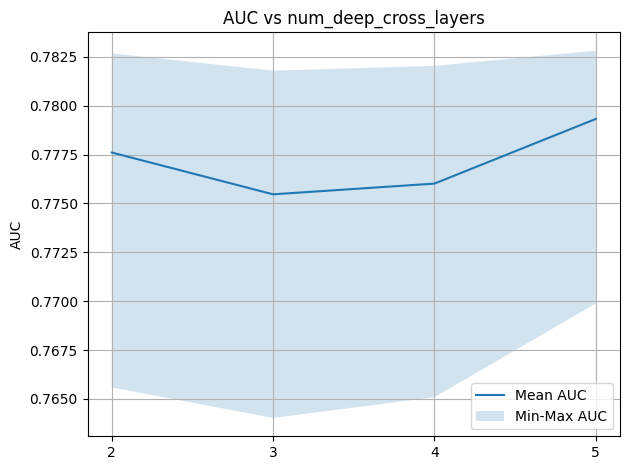

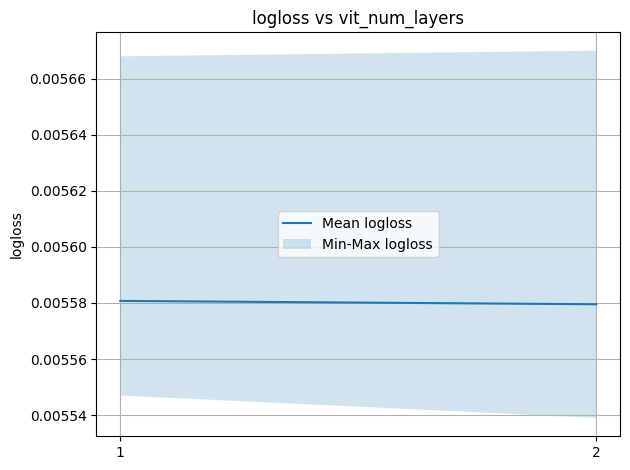

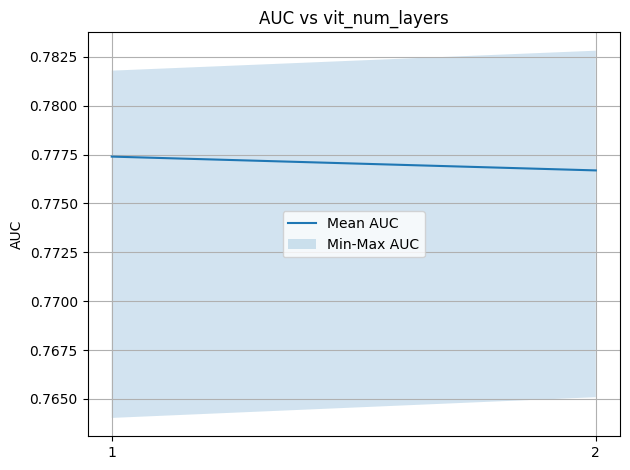

In [ ]:
for param in more_than_two_cols:
    unique_values = df[param].unique()
    logloss_lst, auc_lst = [], []

    try:
        unique_values = sorted(unique_values)
    except:
        pass
    for value in unique_values:
        logloss_result = df[df[param] == value]["logloss"]
        auc_result = df[df[param] == value]["AUC"]

        logloss_lst.append([logloss_result.min(), logloss_result.mean(), logloss_result.max()])
        auc_lst.append([auc_result.min(), auc_result.mean(), auc_result.max()])
    logloss_lst = np.array(logloss_lst)
    auc_lst = np.array(auc_lst)
    metric_dict = {
        "logloss": logloss_lst,
        "AUC": auc_lst
    }
    # for metric in metrics:
    #     print(np.arange(len(metric_dict[metric])))
    #     print(metric_dict[metric][:, 1])
    for metric in metrics:
        plt.figure()
        plt.plot(np.arange(len(metric_dict[metric])), metric_dict[metric][:, 1], label=f'Mean {metric}')
        plt.fill_between(np.arange(len(metric_dict[metric])), metric_dict[metric][:, 0], metric_dict[metric][:, 2], alpha=0.2, label=f'Min-Max {metric}')
        plt.xticks(np.arange(len(metric_dict[metric])), unique_values)
        plt.ylabel(metric)
        plt.title(f'{metric} vs {param}')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

In [ ]:
results

[{'logloss': 0.005657,
  'AUC': 0.776493,
  'batch_norm': True,
  'batch_size': 40960,
  'dataset_id': 'iPinYou_x1_csv_c2b11acf',
  'debug_mode': False,
  'deep_net_dropout': 0.1,
  'early_stop_patience': 2,
  'embedding_dim': 16,
  'embedding_regularizer': 0.001,
  'epochs': 100,
  'eval_steps': None,
  'feature_config': None,
  'feature_specs': None,
  'group_id': None,
  'layer_norm': True,
  'learning_rate': 0.001,
  'loss': 'binary_crossentropy',
  'mask_feature': False,
  'mask_with_bias': True,
  'metrics': ['logloss', 'AUC'],
  'model': 'PGAViT',
  'model_root': './checkpoints/',
  'monitor': {'AUC': 1, 'logloss': 0},
  'monitor_mode': 'max',
  'net_regularizer': 0,
  'num_deep_cross_layers': 3,
  'num_heads': 1,
  'num_shallow_cross_layers': 3,
  'num_workers': 16,
  'optimizer': 'adam',
  'pickle_feature_encoder': True,
  'save_best_only': True,
  'seed': 2024,
  'shallow_net_dropout': 0.2,
  'shuffle': True,
  'task': 'binary_classification',
  'use_features': None,
  'verbo

In [ ]:
df[df["num_deep_cross_layers"] == 5]

,logloss,AUC,batch_norm,batch_size,dataset_id,debug_mode,deep_net_dropout,early_stop_patience,embedding_dim,embedding_regularizer,...,shuffle,task,use_features,verbose,vit_after_steps,vit_detach_param,vit_hidden_dim,vit_num_heads,vit_num_layers,vit_patch_size
1,0.005583,0.771068,True,40960,iPinYou_x1_csv_c2b11acf,False,0.1,2,16,0.001,...,True,binary_classification,<NA>,1,0,True,128,8,1,8
6,0.005561,0.780953,True,40960,iPinYou_x1_csv_c2b11acf,False,0.1,2,16,0.001,...,True,binary_classification,<NA>,1,0,True,128,8,2,8
7,0.005548,0.781299,True,40960,iPinYou_x1_csv_c2b11acf,False,0.1,2,16,0.001,...,True,binary_classification,<NA>,1,0,True,32,8,1,8
13,0.005641,0.772538,True,40960,iPinYou_x1_csv_c2b11acf,False,0.1,2,16,0.001,...,True,binary_classification,<NA>,1,0,True,128,8,1,8
21,0.005578,0.778300,True,40960,iPinYou_x1_csv_c2b11acf,False,0.1,2,16,0.001,...,True,binary_classification,<NA>,1,0,True,32,8,1,8
23,0.005564,0.780766,True,40960,iPinYou_x1_csv_c2b11acf,False,0.1,2,16,0.001,...,True,binary_classification,<NA>,1,0,True,32,8,2,8
25,0.005569,0.782055,True,40960,iPinYou_x1_csv_c2b11acf,False,0.1,2,16,0.001,...,True,binary_classification,<NA>,1,0,True,64,8,1,8
28,0.005568,0.778974,True,40960,iPinYou_x1_csv_c2b11acf,False,0.1,2,16,0.001,...,True,binary_classification,<NA>,1,0,True,64,8,2,8
29,0.005564,0.782820,True,40960,iPinYou_x1_csv_c2b11acf,False,0.1,2,16,0.001,...,True,binary_classification,<NA>,1,0,True,64,8,2,8
33,0.005552,0.781041,True,40960,iPinYou_x1_csv_c2b11acf,False,0.1,2,16,0.001,...,True,binary_classification,<NA>,1,0,True,32,8,1,8


In [ ]:
# df[df["resnet_initialize"]]["logloss"].mean(), df[df["resnet_freeze"]]["logloss"].mean()

In [ ]:
df.sort_values("logloss")[metrics+more_than_two_cols].iloc[:10]

,logloss,AUC,mask_with_bias,num_shallow_cross_layers,vit_hidden_dim,num_deep_cross_layers,vit_num_layers
90,0.005539,0.782056,False,1,64,5,2
72,0.005541,0.782683,False,4,32,2,2
83,0.005543,0.781739,False,4,32,5,2
71,0.005544,0.781528,True,2,32,5,2
88,0.005546,0.780980,False,2,32,2,2
7,0.005548,0.781299,False,4,32,5,1
61,0.005548,0.782961,True,1,32,3,2
45,0.005548,0.779446,False,2,32,2,1
65,0.005549,0.782043,False,3,32,4,2
3,0.005549,0.780742,False,3,64,2,2


In [ ]:
df.sort_values("AUC", ascending=False)[metrics+more_than_two_cols].iloc[:10]

,logloss,AUC,mask_with_bias,num_shallow_cross_layers,vit_hidden_dim,num_deep_cross_layers,vit_num_layers
61,0.005548,0.782961,True,1,32,3,2
29,0.005564,0.782820,False,3,64,5,2
55,0.005558,0.782765,True,1,32,4,1
72,0.005541,0.782683,False,4,32,2,2
90,0.005539,0.782056,False,1,64,5,2
25,0.005569,0.782055,True,1,64,5,1
65,0.005549,0.782043,False,3,32,4,2
20,0.005570,0.781984,False,2,128,2,2
47,0.005558,0.781930,True,1,64,2,2
56,0.005551,0.781799,False,2,32,3,1


In [ ]:
# df.to_pickle(f"{EXP_NAME}_final.pkl")

In [ ]:
df[(df["num_deep_cross_layers"] ==2) & (df["num_shallow_cross_layers"]==3)]

,logloss,AUC,batch_norm,batch_size,dataset_id,debug_mode,deep_net_dropout,early_stop_patience,embedding_dim,embedding_regularizer,...,shuffle,task,use_features,verbose,vit_after_steps,vit_detach_param,vit_hidden_dim,vit_num_heads,vit_num_layers,vit_patch_size
3,0.005549,0.780742,True,40960,iPinYou_x1_csv_c2b11acf,False,0.1,2,16,0.001,...,True,binary_classification,<NA>,1,0,True,64,8,2,8
12,0.005616,0.780483,True,40960,iPinYou_x1_csv_c2b11acf,False,0.1,2,16,0.001,...,True,binary_classification,<NA>,1,0,True,64,8,1,8
46,0.005633,0.769605,True,40960,iPinYou_x1_csv_c2b11acf,False,0.1,2,16,0.001,...,True,binary_classification,<NA>,1,0,True,128,8,2,8
96,0.005551,0.780195,True,40960,iPinYou_x1_csv_c2b11acf,False,0.1,2,16,0.001,...,True,binary_classification,<NA>,1,0,True,32,8,2,8
115,0.005586,0.777390,True,40960,iPinYou_x1_csv_c2b11acf,False,0.1,2,16,0.001,...,True,binary_classification,<NA>,1,0,True,128,8,1,8


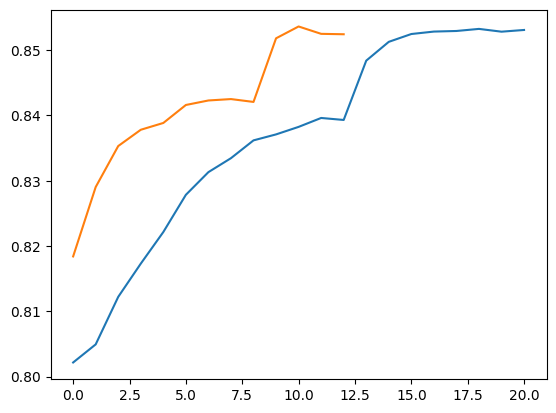

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

vits = [
    0.802154, 0.804925, 0.812207, 0.817295, 0.822139, 0.827837, 0.831312, 0.833450, 0.836177, 0.837092, 0.838243, 0.839610, 0.839304, 0.848389, 0.851271, 0.852469, 0.852843, 0.852934, 0.853253, 0.852827, 0.853089
]

dcnv2 = [
    0.818400, 0.829029, 0.835310, 0.837802, 0.838844, 0.841598, 0.842289, 0.842503, 0.842066, 0.851811, 0.853624, 0.852496, 0.852433
]

plt.plot(np.arange(len(vits)), vits)
plt.plot(np.arange(len(dcnv2)), dcnv2)

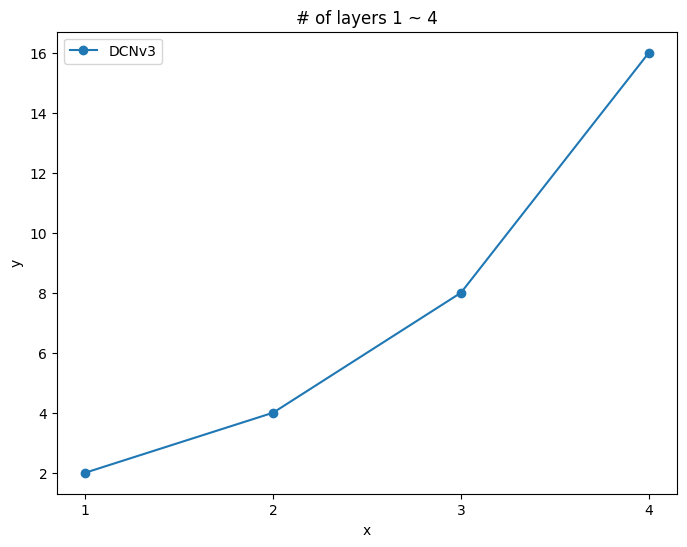

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(4)+1
input_dim = 256
max_feat_inter = np.power(input_dim, x)  # x에 대한 input_dim의 거듭제곱 계산

plt.figure(figsize=(8, 6))

# exp2(x) 그래프
plt.plot(x, np.exp2(x), label='DCNv3', marker='o')

# input_dim에 대한 max_feat_inter 그래프
# plt.plot(x, max_feat_inter, label=f'LogFC', marker='o')

# 제목, 축 라벨, 범례 추가
plt.title('# of layers 1 ~ 4')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.xticks(x)

# 그래프 표시
plt.show()


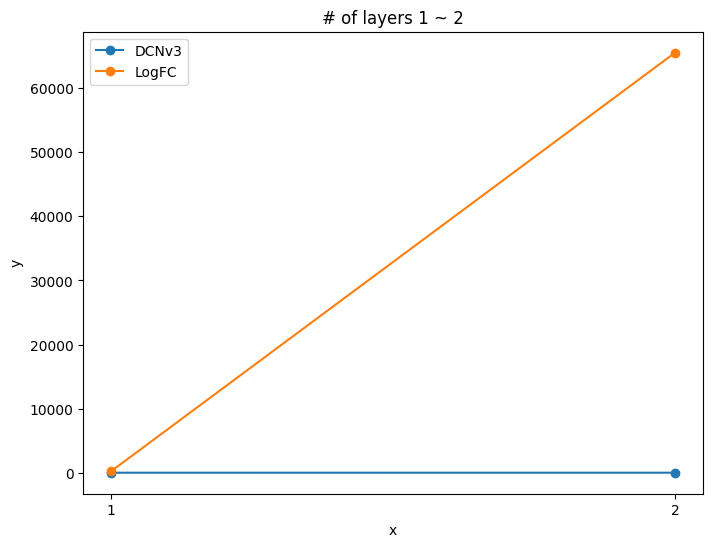

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(2)+1
input_dim = 256
max_feat_inter = np.power(input_dim, x)  # x에 대한 input_dim의 거듭제곱 계산

plt.figure(figsize=(8, 6))

# exp2(x) 그래프
plt.plot(x, np.exp2(x), label='DCNv3', marker='o')

# input_dim에 대한 max_feat_inter 그래프
plt.plot(x, max_feat_inter, label=f'LogFC', marker='o')

# 제목, 축 라벨, 범례 추가
plt.title('# of layers 1 ~ 2')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.xticks(x)
# 그래프 표시
plt.show()


In [ ]:
np.pow(2, 3)

np.int64(8)

In [ ]:
# batchnorm x
auc_lst = [0.621575, 0.678372, 0.734146, 0.758378, 0.760357, 0.763221, 0.760110, 0.766132, 0.768676, 0.770026, 0.772620, 0.774499, 0.775069, 0.775483, 0.775738, 0.776423, 0.775596, 0.775662]
len(auc_lst), max(auc_lst)

(18, 0.776423)

In [ ]:
# batchnorm1d, 1
auc_lst = [0.662880, 0.745848, 0.763363, 0.764978, 0.759760, 0.774287, 0.777002, 0.779828, 0.781120, 0.780510, 0.782375, 0.782507, 0.782368]
len(auc_lst), max(auc_lst)

(13, 0.782507)

In [ ]:
# batchnorm1d, 1, dropout 0.1
auc_lst = []
len(auc_lst), max(auc_lst)